순한맛<br>
상품 코드, 상세페이지url, 이미지url, 할인 후 가격 수집(없으면 원래가격)<br>
매운맛(순한맛 포함)<br>
카테고리별로 데이터 수집해서 각 카테고리별 평균 가격 시각화<br>
- 전체적으로 비교 -> 각 카테고리 별로 비교
- 상위 50 / 하위 50개를 카테고리별로 비교

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
GMARKET_BEST_PRODUCT_URL = "https://corners.gmarket.co.kr/bestsellers"

In [ ]:
import requests
from bs4 import BeautifulSoup as BS
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
response = requests.get(GMARKET_BEST_PRODUCT_URL)
html_src = BS(response.content, "html.parser")

In [ ]:
best_item_sample = html_src.select("#gBestWrap > div.gbest-top > div > div.best-list > ul > li")
best_item_sample

In [ ]:
# 순한 맛
dict_list = []
rule = re.compile("[0-9]+")
for item in range(len(best_item_sample)):
  dict_list.append({})
  상품코드 = re.findall(rule, best_item_sample[item].select_one("a")["href"])[0]
  상세페이지 = best_item_sample[item].select_one("a")["href"]
  이미지 = "https:" + best_item_sample[item].select_one("img.lazy")["data-original"]
  가격 = best_item_sample[item].select_one(".item_price > .s-price > strong > span").text
  dict_list[item]["상품코드"] = 상품코드
  dict_list[item]["상세페이지"] = 상세페이지
  dict_list[item]["이미지"] = 이미지
  dict_list[item]["가격"] = 가격[:-1].replace(",","")
data = pd.DataFrame(dict_list)
data

,상품코드,상세페이지,이미지,가격
0,1833766346,http://item.gmarket.co.kr/Item?goodscode=18337...,https://gdimg.gmarket.co.kr/1833766346/still/3...,16900
1,1707731465,http://item.gmarket.co.kr/Item?goodscode=17077...,https://gdimg.gmarket.co.kr/1707731465/still/3...,14940
2,1894144268,http://item.gmarket.co.kr/Item?goodscode=18941...,https://gdimg.gmarket.co.kr/1894144268/still/3...,22500
3,1158321387,http://item.gmarket.co.kr/Item?goodscode=11583...,https://gdimg.gmarket.co.kr/1158321387/still/3...,32500
4,1827907353,http://item.gmarket.co.kr/Item?goodscode=18279...,https://gdimg.gmarket.co.kr/1827907353/still/3...,15000
...,...,...,...,...
195,2808783843,http://item.gmarket.co.kr/Item?goodscode=28087...,https://gdimg.gmarket.co.kr/2808783843/still/3...,42900
196,1850540165,http://item.gmarket.co.kr/Item?goodscode=18505...,https://gdimg.gmarket.co.kr/1850540165/still/3...,24750
197,2105185856,http://item.gmarket.co.kr/Item?goodscode=21051...,https://gdimg.gmarket.co.kr/2105185856/still/3...,30900
198,2855164895,http://item.gmarket.co.kr/Item?goodscode=28551...,https://gdimg.gmarket.co.kr/2855164895/still/3...,26600


In [ ]:
data.to_csv('best_all.csv', encoding="cp949")

In [ ]:
GMARKET_BEST_PRODUCT_URL_LIST = [
  "https://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G01",
  "https://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G02",
  "https://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G03",
  "https://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G04",
  "https://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G07",
  "https://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G08",
  "https://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G09",
  "https://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G05",
  "https://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G06",
  "https://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G10",
  "https://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G11",
  "https://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G12",
]

In [ ]:
html_src_list = []
best_item_sample_list = []
data_list = []
for idx in range(len(GMARKET_BEST_PRODUCT_URL_LIST)):
  response = requests.get(GMARKET_BEST_PRODUCT_URL_LIST[idx])
  html_src_list.append(BS(response.content, "html.parser"))
  best_item_sample_list.append(html_src_list[idx].select("#gBestWrap > div.gbest-top > div > div.best-list > ul > li"))
  dict_list = []
  for item in range(len(best_item_sample_list[idx])):
    dict_list.append({})
    상품코드 = re.findall(rule, best_item_sample_list[idx][item].select_one("a")["href"])[0]
    상세페이지 = best_item_sample_list[idx][item].select_one("a")["href"]
    이미지 = "https:" + best_item_sample_list[idx][item].select_one("img.lazy")["data-original"]
    가격 = best_item_sample_list[idx][item].select_one(".item_price > .s-price > strong > span").text
    dict_list[item]["상품코드"] = 상품코드
    dict_list[item]["상세페이지"] = 상세페이지
    dict_list[item]["이미지"] = 이미지
    dict_list[item]["가격"] = int(가격[:-1].replace(",",""))
  data = pd.DataFrame(dict_list)
  data.to_csv(f"data{idx}")
  data_list.append(data)

In [ ]:
data_list[1]["이미지"][0]

'https://gdimg.gmarket.co.kr/2793776596/still/300?ver=2023032817'

In [ ]:
x = np.array(range(0,24, 2))
y = [data_list[i]["가격"].mean() for i in range(len(data_list))]
plt.rc('font', family='NanumBarunGothic')

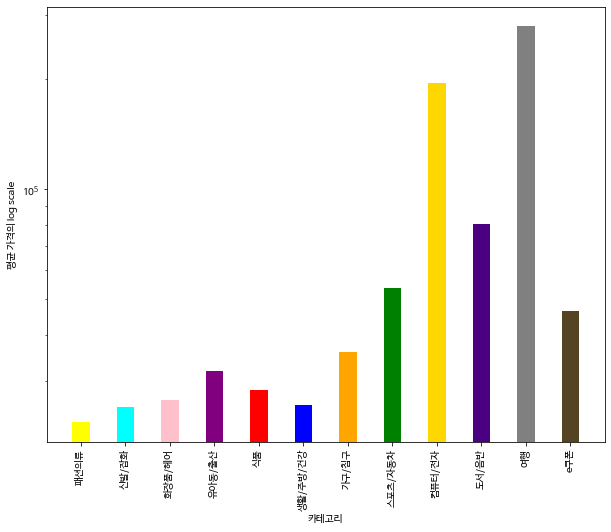

In [ ]:
fig, ax= plt.subplots(figsize=(10,8))
plt.bar(x,y, color = ['yellow', 'cyan', 'pink', 'purple', 'red', 'blue', 'orange', 'green', 'gold', 'indigo', 'gray', '#554422'])
plt.xlabel('카테고리')
plt.xticks(x,["패션의류", "신발/잡화", "화장품/헤어", "유아동/출산", "식품", "생활/주방/건강", "가구/침구", "스포츠/자동차", "컴퓨터/전자", "도서/음반", "여행", "e쿠폰"])
plt.xticks(rotation=90)
plt.ylabel('평균 가격의 log scale')
plt.yticks()
ax.set_yscale("log")
plt.show()

In [ ]:
x = np.array(range(0,24, 2))
y = np.array([[data_list[i]["가격"].head(50).mean(), data_list[i]["가격"].tail(50).mean()] for i in range(len(data_list))])
print(y)
y = y.T
print(y)

[[ 22900.4  23407.6]
 [ 23104.4  27622. ]
 [ 25049.8  28102.4]
 [ 33086.2  30810.6]
 [ 29727.6  26983. ]
 [ 24183.2  27272.8]
 [ 27542.8  44153.4]
 [ 57486.8  49936.8]
 [242529.2 148429.2]
 [ 76477.4  83915.4]
 [164920.8 392538.2]
 [ 45898.   46930.2]]
[[ 22900.4  23104.4  25049.8  33086.2  29727.6  24183.2  27542.8  57486.8
  242529.2  76477.4 164920.8  45898. ]
 [ 23407.6  27622.   28102.4  30810.6  26983.   27272.8  44153.4  49936.8
  148429.2  83915.4 392538.2  46930.2]]


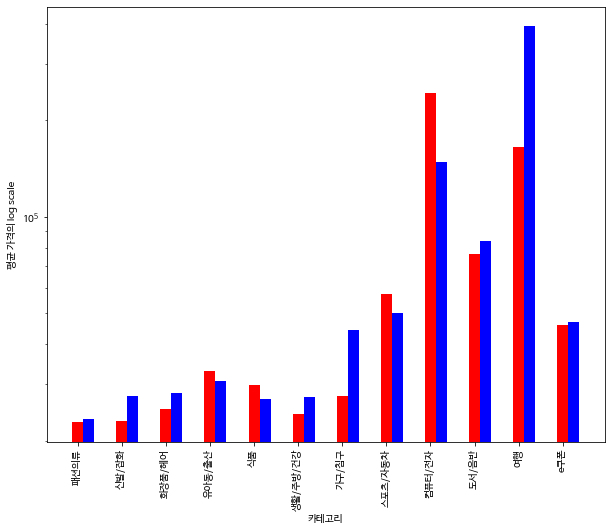

In [ ]:
fig, ax= plt.subplots(figsize=(10,8))

plt.bar(x,y[0], color="red", width = 0.5,label="상위 50")
plt.bar(x+0.5, y[1], color="blue", width = 0.5, label="하위 50")
plt.xlabel('카테고리')
plt.xticks(x,["패션의류", "신발/잡화", "화장품/헤어", "유아동/출산", "식품", "생활/주방/건강", "가구/침구", "스포츠/자동차", "컴퓨터/전자", "도서/음반", "여행", "e쿠폰"])
plt.xticks(rotation=90)
plt.ylabel('평균 가격의 log scale')
plt.yticks()
ax.set_yscale("log")
plt.show()